In [48]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
stock = input("Enter code of the stocks : ")
data = yf.download(stock, '2020-01-01', '2023-12-31', auto_adjust=True)
data.head()

[*********************100%%**********************]  0 of 0 completed


ValueError: No objects to concatenate

In [ ]:
data.shape

(1007, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1007 non-null   float64
 1   High    1007 non-null   float64
 2   Low     1007 non-null   float64
 3   Close   1007 non-null   float64
 4   Volume  1007 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB


In [ ]:
data.describe()

,Open,High,Low,Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,1828.224827,1837.602384,1819.079146,1828.325718,4385.268123
std,114.159337,113.764866,114.653137,114.046079,24057.326026
min,1469.300049,1484.000000,1452.099976,1477.300049,0.000000
25%,1759.050049,1767.200012,1749.900024,1757.799988,83.000000
50%,1826.099976,1833.900024,1817.500000,1828.699951,248.000000
75%,1920.049988,1927.550049,1911.549988,1919.099976,666.000000
max,2081.600098,2130.199951,2066.500000,2081.899902,251274.000000


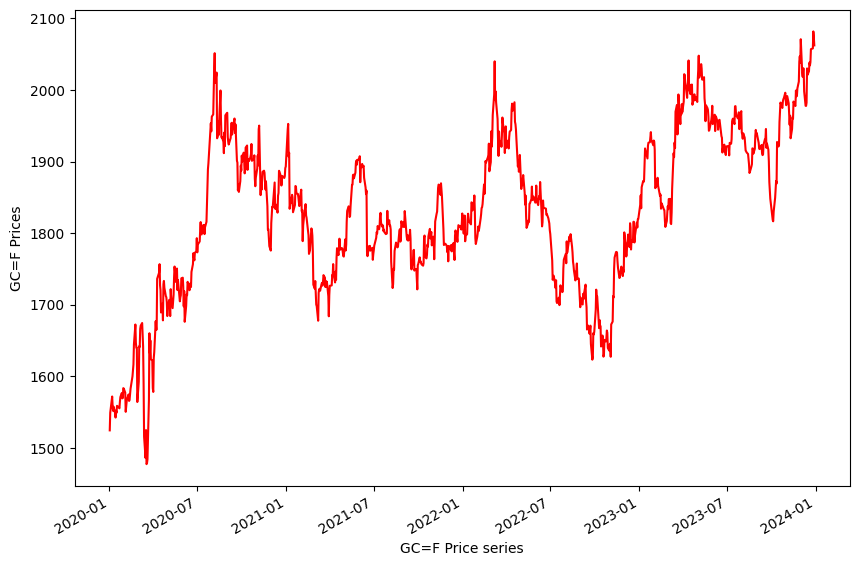

In [ ]:
data.Close.plot(figsize=(10,7), color='r')
plt.xlabel(f"{format(stock)} Price series")
plt.ylabel(f"{format(stock)} Prices")
plt.show()

/tmp/ipykernel_4692/2693321050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

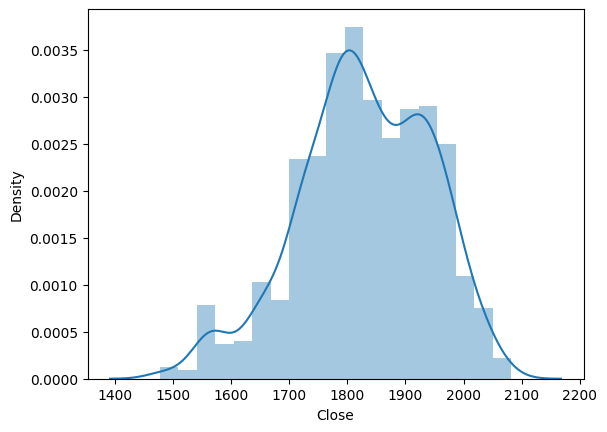

In [ ]:
sns.distplot(data["Close"])

/tmp/ipykernel_4692/3591762098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<Axes: xlabel='Open', ylabel='Density'>

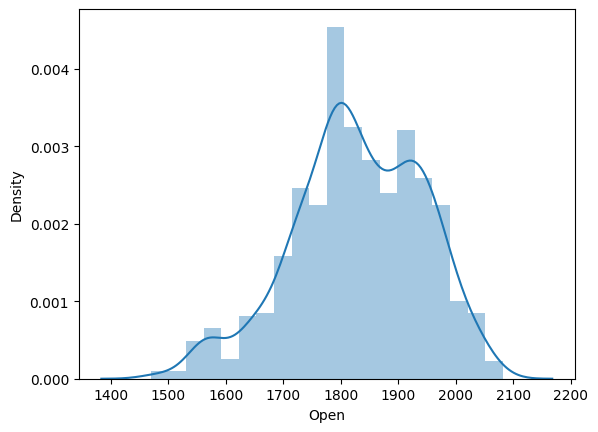

In [ ]:
sns.distplot(data["Open"])


/tmp/ipykernel_4692/3787175542.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<Axes: xlabel='High', ylabel='Density'>

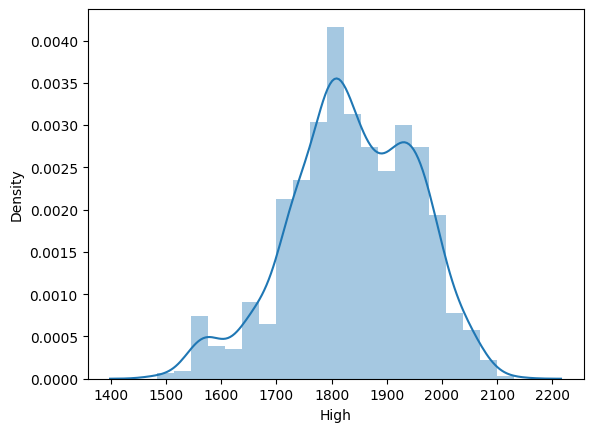

In [ ]:
sns.distplot(data["High"])


In [ ]:
#conclusion

#Understood
#-shape of data
#-how data is distributed
#-It is very very non linear

#Linear, Logistic, Regularized, Support vector machine 

In [ ]:
x = data.drop('Close',axis=1)
y = data['Close']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(805, 4)
(202, 4)
(805,)
(202,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
predict1 = lr.predict(x_test)

In [ ]:
#MSE
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2_scores = r2_score(y_test,y_pred)
    print("MSE : ",mse)
    print("RMSE : ",rmse)
    print("R2 Score : ",r2_scores)

calculate_metrics(y_test,predict1)

MSE :  41.758811277633235
RMSE :  6.462105792822742
R2 Score :  0.9968443120386786


In [ ]:
from sklearn.linear_model import Lasso, Ridge

#Lasso eliminates less important features
#Ridge penalizes less important features

la = Lasso().fit(x_train, y_train)
ri = Ridge().fit(x_train, y_train)

la_predict = la.predict(x_test)
ri_predict = ri.predict(x_test)

In [ ]:
calculate_metrics(y_test,la_predict)

MSE :  41.7521137012786
RMSE :  6.461587552705496
R2 Score :  0.9968448181704488


In [ ]:
calculate_metrics(y_test,ri_predict)

MSE :  41.75887390088165
RMSE :  6.462110638242095
R2 Score :  0.9968443073062778


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
params_grid = {'C':[0.1,1,10,100,1000],
          'gamma':[1,0.1,0.01,0.001,0.0001],
          'kernel':['rbf']}

grid = GridSearchCV(SVR(), params_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.008 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.006 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.008 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.006 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.008 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(x_train, y_train)
svr_predict = svr.predict(x_test)


In [55]:
calculate_metrics(y_test, svr_predict)

MSE :  12855.977168696125
RMSE :  113.38420158336048
R2 Score :  0.028481627205556026


In [57]:
grid_predcit = grid.predict(x_test)
calculate_metrics(y_test, grid_predcit)

MSE :  1468.1033056154279
RMSE :  38.315836224927
R2 Score :  0.8890563264192308
